In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import folium # plotting library
from folium import plugins

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Introduction

### Firstly, we will take a quick look into our data in order to understand with what we are working with! And, then, we will clean/filter it! 

### Afterwards, we will apply k-Means clustering in order to identify similar airports based on the number of occurences of weather events that had happened in that particular airport! Plus, we are going to use Principal Component Analysis in order to visualise high dimensional data, so that, we can see how our clusters are related in the original space.

### Finally, the final result of clustered airports will be illustrated using the Seaborn library and Folium  Maps

# Data Overview

In [93]:
df = pd.read_csv('../../main/data/data_d_final/2d201_1230_collected_data.csv')

df.head()

,지역,latitude,longitude,쏘카존 수,녹지,주거,공업,상업,인구,대학교 수,아파트 수,지하철역 수,정류장 수,환승역 수
0,수원시 장안구,37.303971,127.001743,18,0.272727,0.727273,0.000000,0.000000,271012,4,200,1,409,0
1,수원시 권선구,37.257687,126.963532,16,0.625000,0.312500,0.062500,0.000000,367004,1,159,4,537,0
2,수원시 팔달구,37.282570,127.011718,20,0.136364,0.409091,0.000000,0.454545,192225,0,65,4,185,2
3,수원시 영통구,37.259600,127.042341,34,0.142857,0.571429,0.285714,0.000000,360127,21,129,6,380,0
4,용인시 처인구,37.234346,127.192965,29,0.823529,0.058824,0.000000,0.117647,259872,15,112,9,1234,0


# k-Means Clustering

In [41]:
types = df.copy()

In [42]:
regions = types[['지역']]
types.drop('지역', axis=1, inplace=True)
types

,latitude,longitude,쏘카존 수,녹지,주거,공업,상업,인구,대학교 수,아파트 수,지하철역 수,정류장 수,환승역 수
0,37.303971,127.001743,18,0.272727,0.727273,0.000000,0.000000,271012,4,200,1,409,0
1,37.257687,126.963532,16,0.625000,0.312500,0.062500,0.000000,367004,1,159,4,537,0
2,37.282570,127.011718,20,0.136364,0.409091,0.000000,0.454545,192225,0,65,4,185,2
3,37.259600,127.042341,34,0.142857,0.571429,0.285714,0.000000,360127,21,129,6,380,0
4,37.234346,127.192965,29,0.823529,0.058824,0.000000,0.117647,259872,15,112,9,1234,0
5,37.280450,127.106283,37,0.727273,0.181818,0.090909,0.000000,438500,16,251,11,1524,2
6,37.322242,127.089401,37,0.428571,0.571429,0.000000,0.000000,377198,9,214,5,53,0
7,37.450396,127.137254,18,0.631579,0.368421,0.000000,0.000000,232125,11,91,9,436,2
8,37.430523,127.128830,13,0.555556,0.222222,0.111111,0.111111,206211,1,79,1,251,0
9,37.382819,127.110546,58,0.500000,0.500000,0.000000,0.000000,482026,1,231,12,694,3


### In order to identify the optimal number of clusters, we need to use the Elbow Method! When the slope of the tangent line starts to be almost horizontal, that is the optimal number of cluster!

In [43]:
distortions = []

K = range(1,20)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=0, n_init = 50, max_iter = 500)
    kmean.fit(types)
    distortions.append(kmean.inertia_)

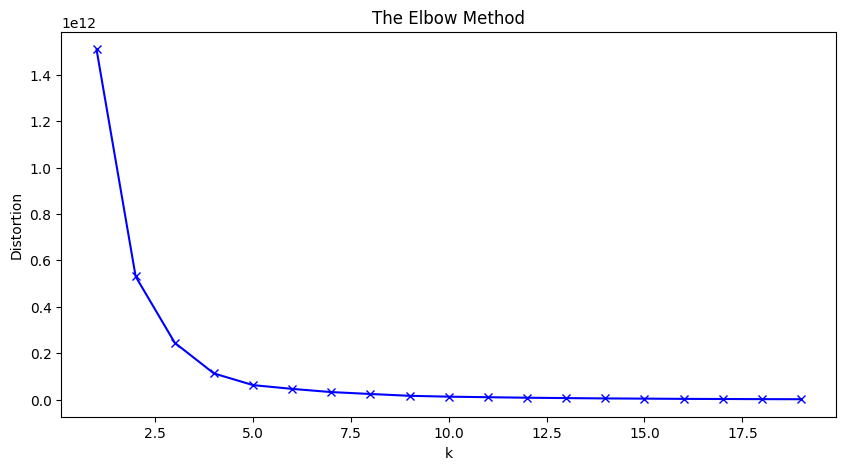

In [44]:
plt.figure(figsize=(10,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method')
plt.show()

### The elbow method seems to suggest 4 or 5 clusters!

In [45]:
# run k-means clustering
kmeans = KMeans(n_clusters=5, random_state=0).fit(types)

regions['cluster'] = kmeans.labels_
regions.head()

c:\Users\govin\Link\resources\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\govin\AppData\Local\Temp\ipykernel_4460\856942165.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regions['cluster'] = kmeans.labels_


,지역,cluster
0,수원시 장안구,4
1,수원시 권선구,0
2,수원시 팔달구,4
3,수원시 영통구,0
4,용인시 처인구,4


### I am used to apply some dimensionality reduction techniques in order to visualise how our clusters are related in the original high dimensional space! Moreover, we are able to see if the features of our data are linear related among them.

In [46]:
pca = PCA().fit(types)
pca_types = pca.transform(types)
print("Variance explained by each component (%): ")
for i in range(len(pca.explained_variance_ratio_)):
      print("\n",i+1,"º:", pca.explained_variance_ratio_[i]*100)
print("Total sum (%): ",sum(pca.explained_variance_ratio_)*100)
print("Explained variance of the first two components (%): ",sum(pca.explained_variance_ratio_[0:1])*100)

Variance explained by each component (%): 

 1 º: 99.99939484964298

 2 º: 0.0006001168051039031

 3 º: 4.716127035866165e-06

 4 º: 1.9431955015355986e-07

 5 º: 8.319549023156874e-08

 6 º: 3.763755334127962e-08

 7 º: 1.941943505422817e-09

 8 º: 1.4467643973160067e-10

 9 º: 1.0767984362181045e-10

 10 º: 4.6641884628621796e-11

 11 º: 2.0310647329855234e-11

 12 º: 1.1027982843760885e-11

 13 º: 4.059457193560809e-40
Total sum (%):  99.99999999999999
Explained variance of the first two components (%):  99.99939484964298


### Since the number of samples are larger than the number of features, we are able to solve all 5 principal components (PC), leading to 100% of the original information being explained by these PC. 

### We can see that using the first two components we are able to preserve 63,65% of the original information, therefore, reducing the dimensionality of our data.

### Let's use these PC to visualise our clusters!

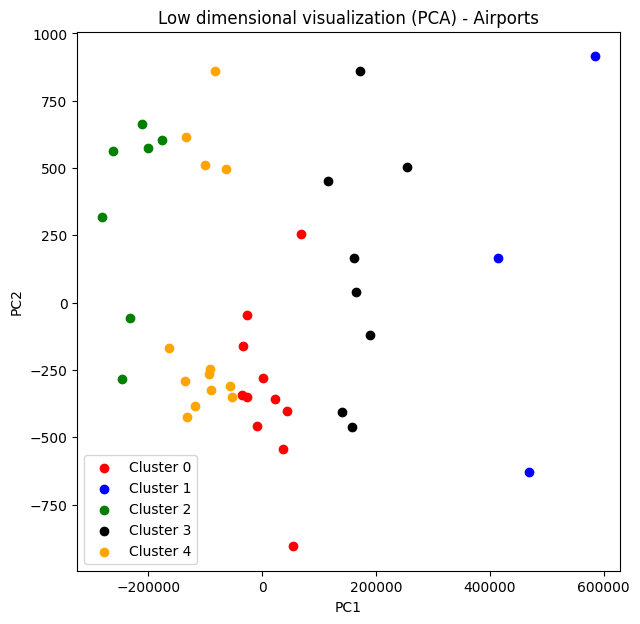

In [47]:
c0 = []
c1 = []
c2 = []
c3 = []
c4 = []

for i in range(len(pca_types)):
    if kmeans.labels_[i] == 0:
        c0.append(pca_types[i])
    if kmeans.labels_[i] == 1:
        c1.append(pca_types[i])
    if kmeans.labels_[i] == 2:
        c2.append(pca_types[i])
    if kmeans.labels_[i] == 3:
        c3.append(pca_types[i])
    if kmeans.labels_[i] == 4:
        c4.append(pca_types[i])
        
        
c0 = np.array(c0)
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)
c4 = np.array(c4)

plt.figure(figsize=(7,7))
plt.scatter(c0[:,0], c0[:,1], c='red', label='Cluster 0')
plt.scatter(c1[:,0], c1[:,1], c='blue', label='Cluster 1')
plt.scatter(c2[:,0], c2[:,1], c='green', label='Cluster 2')
plt.scatter(c3[:,0], c3[:,1], c='black', label='Cluster 3')
plt.scatter(c4[:,0], c4[:,1], c='orange', label='Cluster 4')
plt.legend()
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Low dimensional visualization (PCA) - Airports');

### We see that 4 clusters seems to be reasonable to identify similar samples within our data!

### Let's take a look in the particularity of each cluster using seaborn library!

In [48]:
types['cluster']  = kmeans.labels_

types.head()

,latitude,longitude,쏘카존 수,녹지,주거,공업,상업,인구,대학교 수,아파트 수,지하철역 수,정류장 수,환승역 수,cluster
0,37.303971,127.001743,18,0.272727,0.727273,0.000000,0.000000,271012,4,200,1,409,0,4
1,37.257687,126.963532,16,0.625000,0.312500,0.062500,0.000000,367004,1,159,4,537,0,0
2,37.282570,127.011718,20,0.136364,0.409091,0.000000,0.454545,192225,0,65,4,185,2,4
3,37.259600,127.042341,34,0.142857,0.571429,0.285714,0.000000,360127,21,129,6,380,0,0
4,37.234346,127.192965,29,0.823529,0.058824,0.000000,0.117647,259872,15,112,9,1234,0,4


In [49]:
types.groupby('cluster').mean()

,latitude,longitude,쏘카존 수,녹지,주거,공업,상업,인구,대학교 수,아파트 수,지하철역 수,정류장 수,환승역 수
cluster,,,,,,,,,,,,,
0,37.421411,126.956040,27.727273,0.464258,0.456148,0.051136,0.028458,332181.727273,4.545455,138.454545,5.272727,545.727273,0.454545
1,37.446381,126.930976,56.666667,0.441551,0.480140,0.069300,0.009009,812195.666667,14.333333,431.000000,11.333333,1928.666667,1.333333
2,37.706587,127.271268,5.428571,0.859127,0.117063,0.011905,0.011905,93776.857143,4.000000,45.000000,3.571429,763.571429,0.000000
3,37.473013,126.930534,44.875000,0.614231,0.328389,0.037436,0.019944,492640.750000,6.000000,273.125000,11.000000,1304.375000,1.125000
4,37.354211,127.093336,15.769231,0.542483,0.347954,0.038967,0.070596,222699.076923,6.076923,117.000000,3.692308,644.615385,0.461538


c:\Users\govin\Link\resources\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 50136 (\N{HANGUL SYLLABLE SSO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\govin\Link\resources\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 52852 (\N{HANGUL SYLLABLE KA}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\govin\Link\resources\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 51316 (\N{HANGUL SYLLABLE JON}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\govin\Link\resources\miniconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\govin\Link\resources\miniconda3\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50136 (\N{HANGUL SYLLABLE SSO}) missing from current font.
  func(*ar

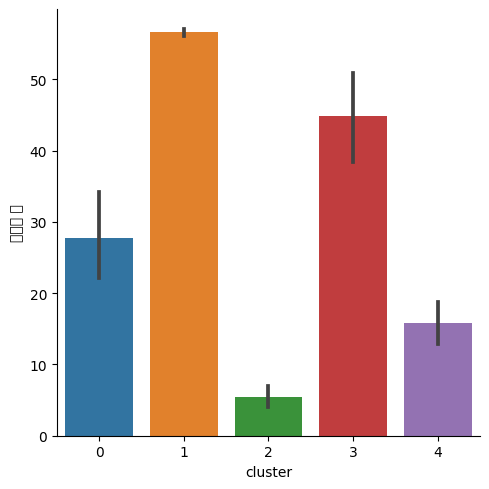

In [50]:
sns.catplot(x='cluster', y='쏘카존 수', data=types, kind='bar');

### Looking into these plots we can see that cluster 0 is the most affected by snow and cold! And cluster 3 is the most affected by rains!

# Folium Maps Visualisation by Number of Occurences and Clustering

### Firstly, we need to create a map of USA

### We are going to plot two maps: the first one will display airports by their number of weather events that occured in that airport! The size of each mark (of each airport) will vary accordingly to these numbers. The second map will show us the clusters that we had acquired through k-Means!


In [51]:
latitude = 37.532600
longitude = 127.024612

map_gg = folium.Map(location=[latitude, longitude], zoom_start=9)

map_gg

In [52]:
df.columns

Index(['지역', ' latitude', ' longitude', '쏘카존 수', '녹지', '주거', '공업', '상업', '인구',
       '대학교 수', '아파트 수', '지하철역 수', '정류장 수', '환승역 수'],
      dtype='object')

In [90]:
cities = df[['지역', 'latitude', 'longitude', '쏘카존 수']]
cities.head()

KeyError: "['latitude', 'longitude'] not in index"

In [62]:
number_of_occurences = pd.DataFrame(cities['지역'].value_counts())
number_of_occurences.reset_index(inplace=True)
number_of_occurences.columns = ['지역', 'Count']
number_of_occurences.head()

,지역,Count
0,수원시 장안구,1
1,고양시 일산동구,1
2,오산시,1
3,이천시,1
4,안성시,1


In [63]:
number_of_occurences = number_of_occurences.merge(cities.drop_duplicates())

number_of_occurences = number_of_occurences.merge(regions)

number_of_occurences.head()

,지역,Count,latitude,longitude,쏘카존 수,cluster
0,수원시 장안구,1,37.303971,127.001743,18,4
1,고양시 일산동구,1,37.658622,126.771006,51,0
2,오산시,1,37.149887,127.069083,15,4
3,이천시,1,37.272342,127.426655,14,4
4,안성시,1,37.008055,127.271394,13,4


In [89]:
number_of_occurences.columns

Index(['지역', 'Count', ' latitude', ' longitude', '쏘카존 수', 'cluster'], dtype='object')

In [66]:
occurences = folium.map.FeatureGroup()
n_mean = number_of_occurences['Count'].mean()

for lat, lng, number in zip(number_of_occurences['latitude'],
                            number_of_occurences['longitude'],
                            number_of_occurences['Count']):
    occurences.add_child(
        folium.vector_layers.CircleMarker(
            [lat, lng],
            radius=number/n_mean*5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            tooltip = str(number)+','+str(city) +','+ str(state)
        )
    )

map_USA.add_child(occurences)

KeyError: 'latitude'

### We can see that the airports that had registered the greatest number of occurences are in the north of the West Coast!

### But, in general, the airports that are located far away from the coast had suffered less from weather events! However, the state of Colorado seems to be a exception to that :)

### Finally, let's see our clusters!

In [26]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(4)
ys = [i + x + (i*x)**2 for i in range(4)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, cluster, city, state in zip(number_of_occurences['LocationLat'], number_of_occurences['LocationLng'],  
                                            number_of_occurences['cluster'],
                                         number_of_occurences['City'],
                                         number_of_occurences['State']):
    #label = folium.Popup(str(city)+ ','+str(state) + '- Cluster ' + str(cluster), parse_html=True)
    folium.vector_layers.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        tooltip = str(city)+ ','+str(state) + '- Cluster ' + str(cluster),
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

### We can see that cluster 0, the one most affected by snow events, are mainly located to the north border of USA, very close to Canada!

### And here I conclude this notebook suggesting some future work! Maybe the use of 5 clusters may reveal to us a better look into our data. It seems to me that cluster 1 are not well defined! Furthermore, a better investigation of each cluster may show us other differences among them!

### Thank you,
### Lucas